In [11]:
import pandas as pd
import seaborn
import math
import numpy as np
import matplotlib.pyplot as plt

import decomposition
import potential_data
import scaler
import plots
import potential_analyze
import fit

pd.options.mode.chained_assignment = None

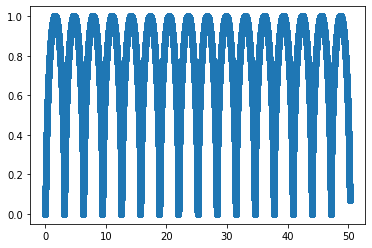

In [7]:
def x_t(v, R, t):
    return v * t - R * np.sin(t*v/R)

def y_t(v, R, t):
    return R * (1 - np.cos(t*v/R))

R = 0.5
v = 5
t = np.linspace(0, 10, 100000)
x = x_t(v, R, t)
y = y_t(v, R, t)
plt.scatter(x, y)
plt.savefig('../../result/motion', dpi=800, facecolor='white')

In [2]:
a = np.array([1, 2, 3], dtype=float)
print(a)
print(np.reciprocal(a))
b = 6.3
print(np.reciprocal(b))

[1. 2. 3.]
[1.         0.5        0.33333333]
0.15873015873015872


In [3]:
# fit several potentials, fit them and extract string tension

In [ ]:
show_plot = True
coordinate = 'r/a'
hue = 'copy'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/potential_monopole.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 12), 'T': (11, 11)}}]
image_path = f'../../images/potential/su3/gluodynamics/24^4/beta6.0/'
image_name = f'copy_comparison'
data = potential_data.get_potantial_df(paths)
# data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (1, 12)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (5, 12), fit.func_linear, ['V0', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (5, 12), fit.func_linear, ['V0', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index(drop=True)
print(fit_params)
fit_params['sigma_err'] = fit_params['sigma_err']/(2*np.sqrt(fit_params['sigma']))
fit_params['sigma'] = np.sqrt(fit_params['sigma'])
# print(math.sqrt(fit_params.at[1, 'sigma']), fit_params.at[1, 'sigma_err']/(2*math.sqrt(fit_params.at[1, 'sigma'])))
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit)
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
fit_params['fit'] = 'fit'
plots.plot_potential_single(fit_params, 'beta', 'sigma', 'sigma_err', 'fit', 'beta', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, df_fits=df_string_tension_fit)
# plots.plot_potential_single(fit_params, 'beta', 'alpha', 'alpha_err', 'fit', 'beta', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, black_line_y=-math.pi/12)

/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


   beta        V0    V0_err     alpha  alpha_err     sigma  sigma_err  \
0   6.0  0.148990  0.000445 -0.258393   0.000838  0.047866   0.000057   
1   6.1  0.162163  0.000866 -0.264541   0.001720  0.034663   0.000102   
2   6.2  0.170239  0.000854 -0.269015   0.001879  0.025627   0.000087   
3   6.3  0.172337  0.000953 -0.266357   0.002085  0.019453   0.000099   
4   6.4  0.173718  0.001013 -0.265098   0.002315  0.014763   0.000098   

     chi_sq  
0  0.000006  
1  0.000018  
2  0.000008  
3  0.000046  
4  0.000044  
   beta        V0    V0_err     alpha  alpha_err     sigma  sigma_err  \
0   6.0  0.148990  0.000445 -0.258393   0.000838  0.218783   0.000130   
1   6.1  0.162163  0.000866 -0.264541   0.001720  0.186180   0.000275   
2   6.2  0.170239  0.000854 -0.269015   0.001879  0.160086   0.000271   
3   6.3  0.172337  0.000953 -0.266357   0.002085  0.139473   0.000355   
4   6.4  0.173718  0.001013 -0.265098   0.002315  0.121502   0.000403   

     chi_sq  
0  0.000006  
1  0.00001

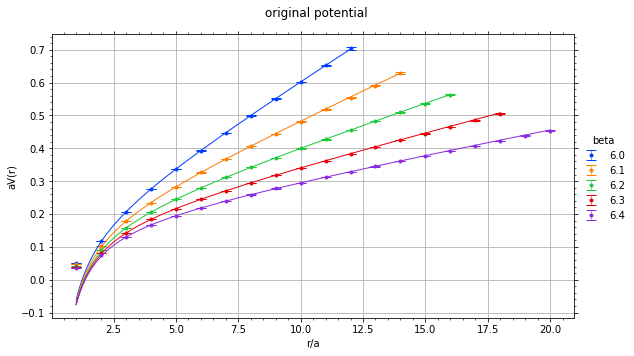

../../images/potential/su3/gluodynamics//beta_comparison


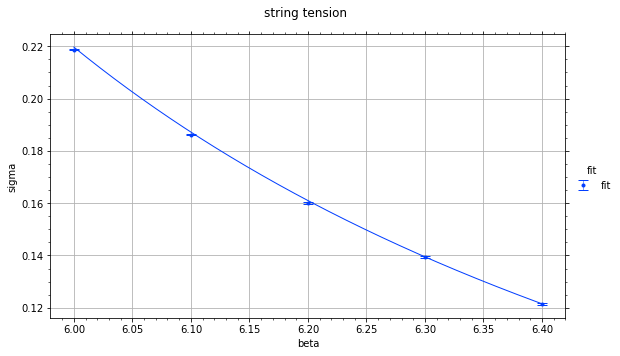

../../images/potential/su3/gluodynamics//string_tension


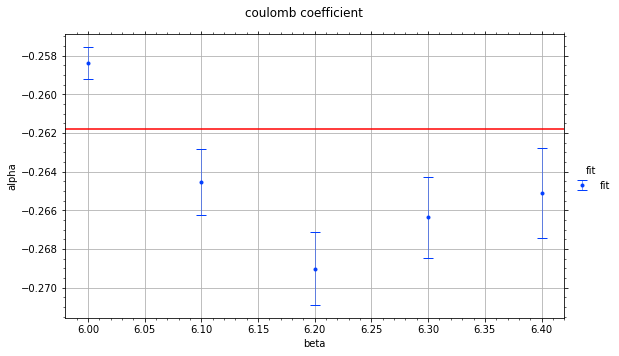

../../images/potential/su3/gluodynamics//coulomb_coefficient


In [13]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 12), 'T': (1, 10)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/28^4/beta6.1/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.1}, 'constraints': {'r/a': (1, 14), 'T': (1, 10)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.2}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.3}, 'constraints': {'r/a': (1, 18), 'T': (1, 10)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.4/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.4}, 'constraints': {'r/a': (1, 20), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/'
image_name = f'beta_comparison'
data = potential_data.get_potantial_df(paths)
data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (2, 12)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (3, 18), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (3, 18), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index(drop=True)
print(fit_params)
fit_params['sigma_err'] = fit_params['sigma_err']/(2*np.sqrt(fit_params['sigma']))
fit_params['sigma'] = np.sqrt(fit_params['sigma'])
# print(math.sqrt(fit_params.at[1, 'sigma']), fit_params.at[1, 'sigma_err']/(2*math.sqrt(fit_params.at[1, 'sigma'])))
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit)
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
fit_params['fit'] = 'fit'
plots.plot_potential_single(fit_params, 'beta', 'sigma', 'sigma_err', 'fit', 'beta', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, df_fits=df_string_tension_fit)
plots.plot_potential_single(fit_params, 'beta', 'alpha', 'alpha_err', 'fit', 'beta', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, black_line_y=-math.pi/12)

         beta  size        r/a     aV(r)
0    beta=6.0  24^4   1.000000  0.381979
1    beta=6.0  24^4   1.011011  0.386154
2    beta=6.0  24^4   1.022022  0.390249
3    beta=6.0  24^4   1.033033  0.394268
4    beta=6.0  24^4   1.044044  0.398213
..        ...   ...        ...       ...
995  beta=6.0  24^4  11.955956  1.198519
996  beta=6.0  24^4  11.966967  1.199055
997  beta=6.0  24^4  11.977978  1.199592
998  beta=6.0  24^4  11.988989  1.200129
999  beta=6.0  24^4  12.000000  1.200665

[1000 rows x 4 columns]
       beta  size        V0    V0_err     alpha  alpha_err     sigma  \
0  beta=6.0  24^4  0.679177  0.006382 -0.349226   0.014163  0.045581   

   sigma_err    chi_sq  
0   0.000545  0.000055  
0.2134962778954389


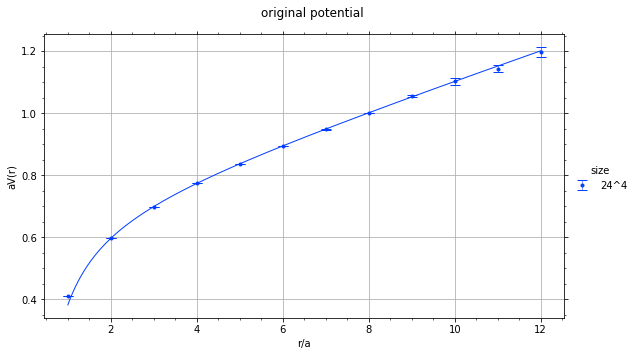

../../images/potential/su3/gluodynamics/beta6.0//size_comparison


In [3]:
show_plot = True
coordinate = 'r/a'
hue = 'size'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'size': '24^4'}, 'constraints': {'r/a': (1, 12), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/beta6.0/'
image_name = f'size_comparison'
data = potential_data.get_potantial_df(paths)
data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (2, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col=None)\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
print(df_fit)
print(fit_params)
fit_params = fit_params.reset_index()
print(math.sqrt(fit_params.at[0, 'sigma']))
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)

   index      beta     size        V0    V0_err     alpha  alpha_err  \
0      0  beta=6.2  32^3x64  0.645419  0.003120 -0.322844   0.007939   
1      0  beta=6.2     32^4  0.638481  0.001475 -0.310809   0.003753   

      sigma  sigma_err    chi_sq  
0  0.024667   0.000216  0.000045  
1  0.025398   0.000102  0.000012  
0.1593676579186971 0.0003197910388366388


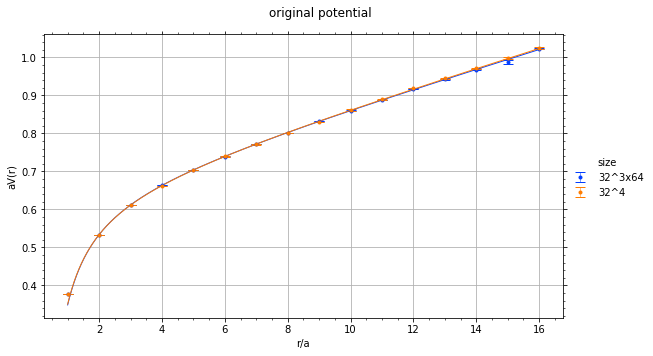

../../images/potential/su3/gluodynamics/beta6.2//size_comparison


In [9]:
show_plot = True
coordinate = 'r/a'
hue = 'size'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^4/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'size': '32^4'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'size': '32^3x64'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/beta6.2/'
image_name = f'size_comparison'
data = potential_data.get_potantial_df(paths)
data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (2, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col=None)\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index()
print(fit_params)
print(math.sqrt(fit_params.at[1, 'sigma']), fit_params.at[1, 'sigma_err']/(2*math.sqrt(fit_params.at[1, 'sigma'])))
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)

         V0    V0_err     alpha  alpha_err     sigma  sigma_err    chi_sq
0  0.638481  0.001475 -0.310809   0.003753  0.025398   0.000102  0.000012


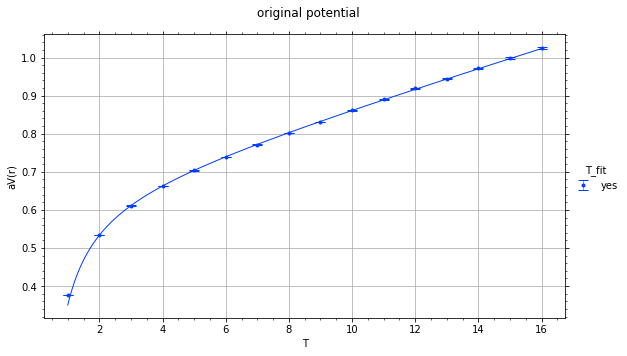

../../images/potential/su3/gluodynamics/32^4/beta6.2//potential_orignal


In [9]:
show_plot = True
coordinate = 'r/a'
hue = 'T_fit'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^4/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/32^4/beta6.2/'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
data = data.groupby('r/a').apply(fit.potential_fit_T, (2, 8)).reset_index(level='r/a')
data['T_fit'] = 'yes'
data['potential_type'] = 'original'
df_fit = fit.potential_fit_data(data, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')
df_fit['potential_type'] = 'original'
fit_params = fit.make_fit(data, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col=None)
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)

         V0   V0_err     alpha  alpha_err     sigma  sigma_err    chi_sq
0  0.645419  0.00312 -0.322844   0.007939  0.024667   0.000216  0.000045


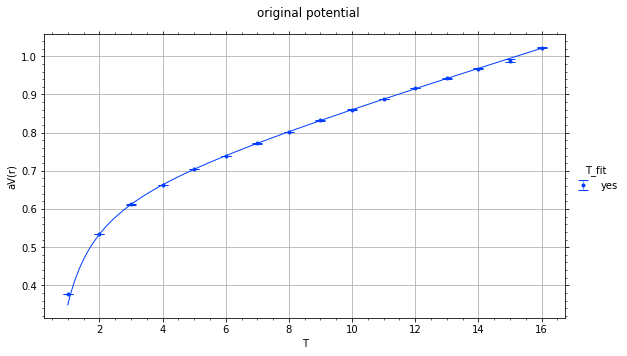

../../images/potential/su3/gluodynamics/32^3/beta6.2//potential_orignal


In [7]:
show_plot = True
coordinate = 'r/a'
hue = 'T_fit'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/32^3x64/beta6.2/'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
data = data.groupby('r/a').apply(fit.potential_fit_T, (2, 8)).reset_index(level='r/a')
data['T_fit'] = 'yes'
data['potential_type'] = 'original'
df_fit = fit.potential_fit_data(data, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')
df_fit['potential_type'] = 'original'
fit_params = fit.make_fit(data, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col=None)
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)

      T  r/a     aV(r)       err      beta potential_type smearing
0     1    1  0.044800  0.000002  beta=6.2       original  HYP_APE
1     2    1  0.043033  0.000002  beta=6.2       original  HYP_APE
2     3    1  0.042469  0.000002  beta=6.2       original  HYP_APE
3     4    1  0.042231  0.000002  beta=6.2       original  HYP_APE
4     5    1  0.042121  0.000002  beta=6.2       original  HYP_APE
..   ..  ...       ...       ...       ...            ...      ...
219  10   16  0.557197  0.005760  beta=6.2       original  HYP_APE
220  11   16  0.558451  0.008979  beta=6.2       original  HYP_APE
221  12   16  0.548939  0.013847  beta=6.2       original  HYP_APE
222  13   16  0.558154  0.022089  beta=6.2       original  HYP_APE
223  14   16  0.501739  0.033206  beta=6.2       original  HYP_APE

[224 rows x 7 columns]


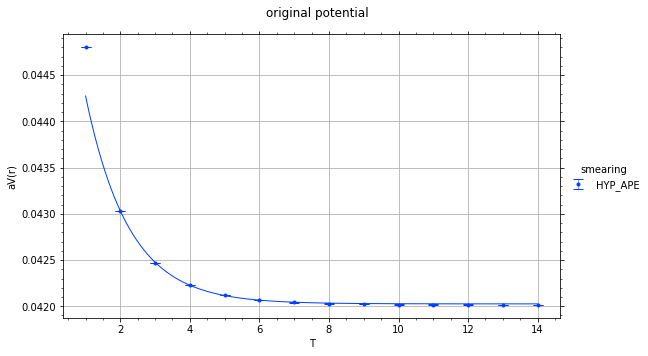

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


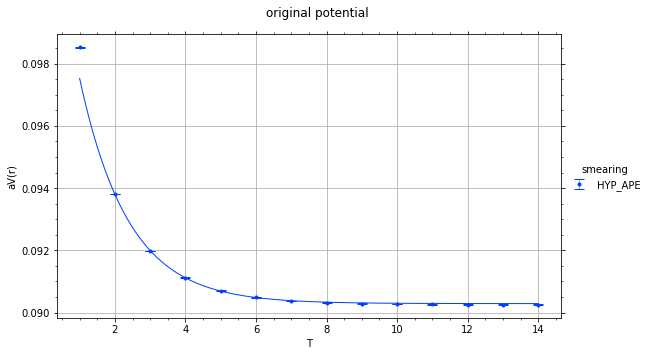

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


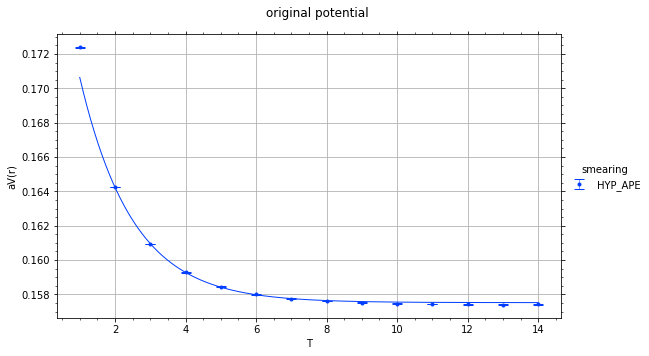

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


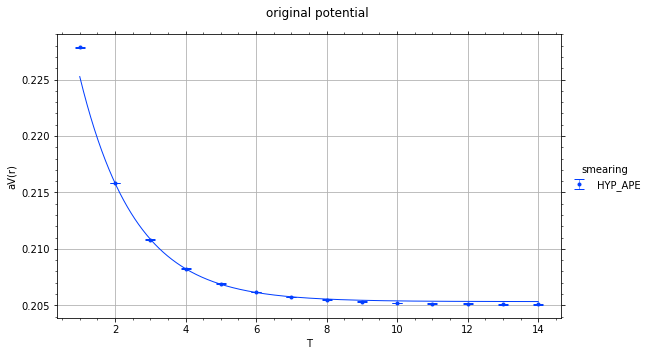

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


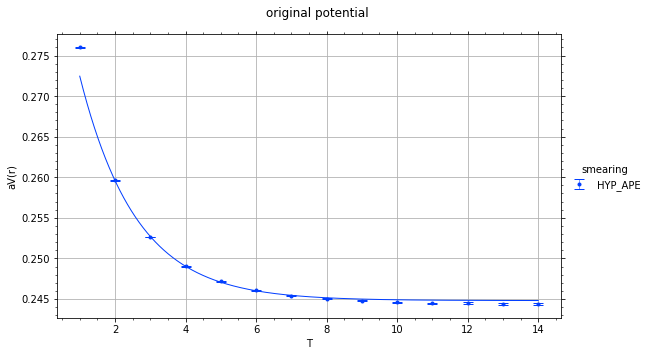

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


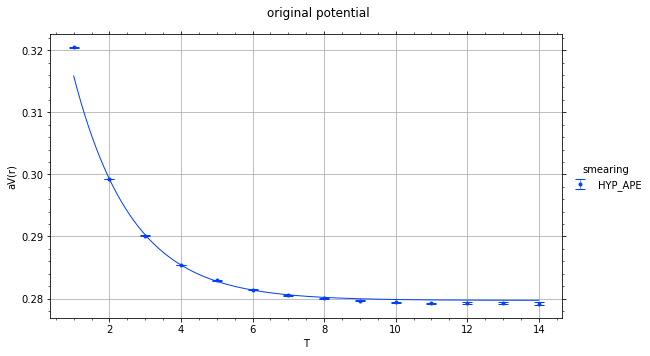

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


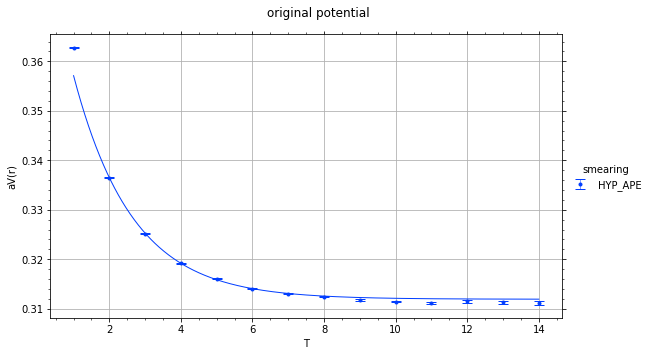

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


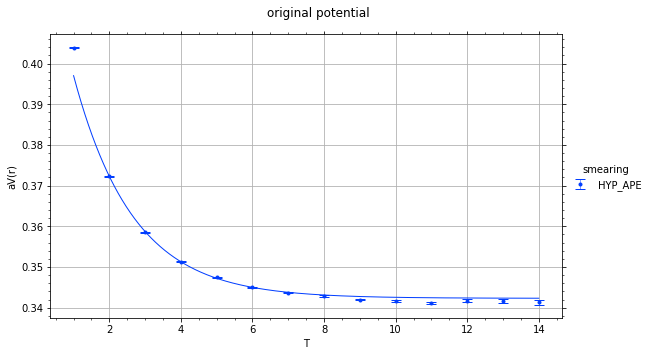

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


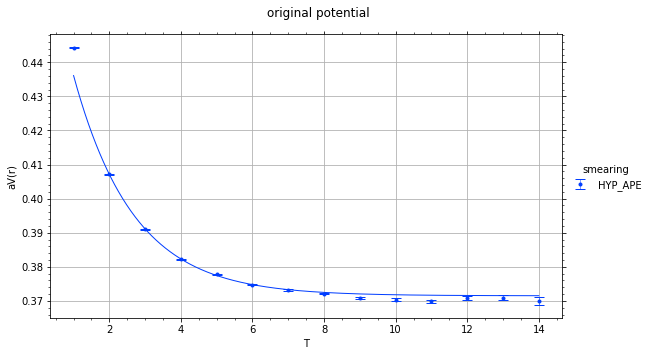

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


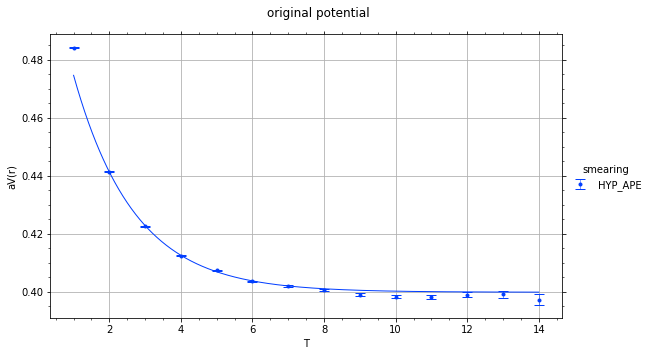

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


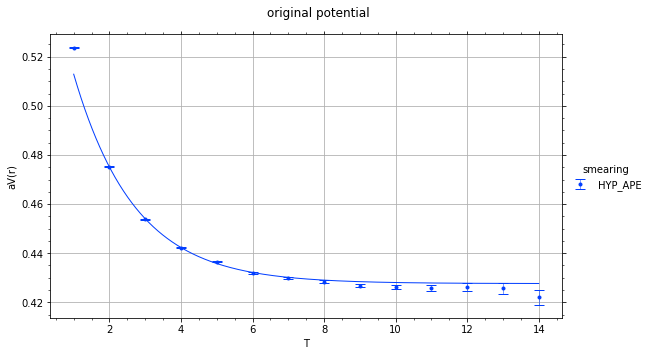

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


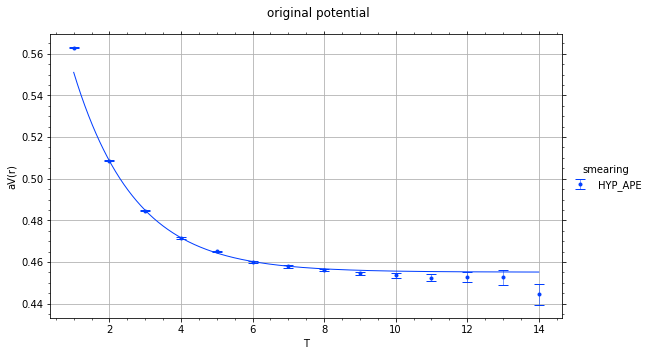

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


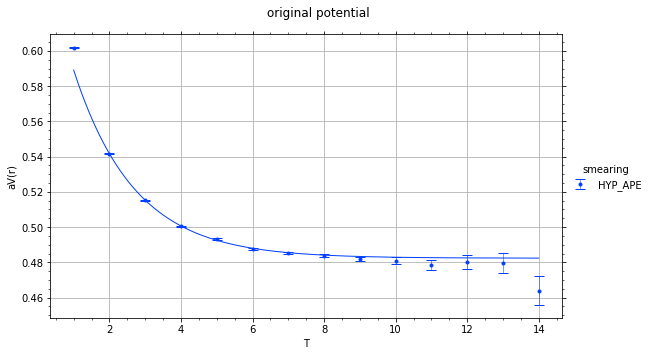

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


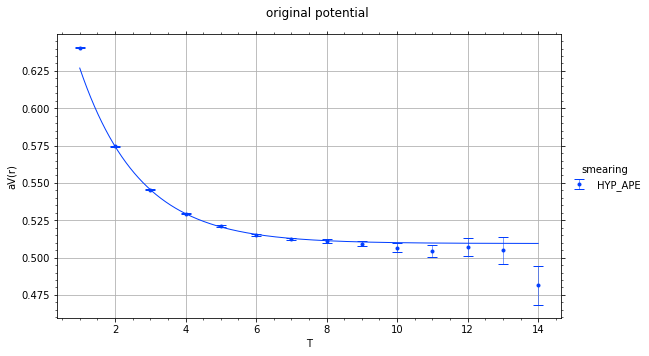

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


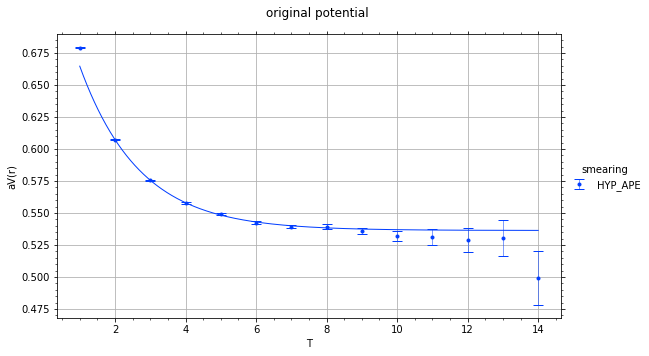

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


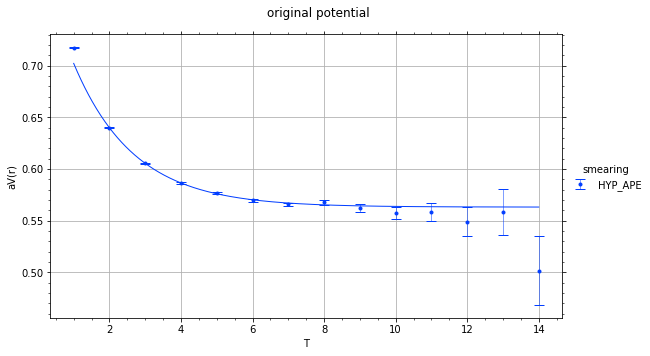

../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit/potential_orignal


In [8]:
show_plot = True
coordinate = 'T'
hue = 'smearing'
groupby = []
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'original', 'smearing': 'HYP_APE'}, 'constraints': {'r/a': (1, 16), 'T': (1, 14)}}]
image_path = f'../../images/potential/su3/gluodynamics/32^3x64/beta6.2/T_fit'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
df_fits = data.groupby('r/a').apply(fit.potential_fit_data, (2, 8), fit.func_exponent,['C', 'b', 'V'], 'T', 'aV(r)', err_col='err').reset_index(level='r/a')
df_fits['smearing'] = 'HYP_APE'
print(data)
for r in data['r/a'].unique():
    plots.plot_potential_single(data[data['r/a'] == r], coordinate, 'aV(r)', 'err', hue, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits[df_fits['r/a'] == r])

      T  r/a     aV(r)       err      beta potential_type smearing
0     1    1  0.380989  0.000007  beta=6.2       original      APE
1     2    1  0.378617  0.000009  beta=6.2       original      APE
2     3    1  0.377752  0.000011  beta=6.2       original      APE
3     4    1  0.377409  0.000014  beta=6.2       original      APE
4     5    1  0.377255  0.000019  beta=6.2       original      APE
..   ..  ...       ...       ...       ...            ...      ...
155   6   16  1.028297  0.004943  beta=6.2       original      APE
156   7   16  1.007935  0.013092  beta=6.2       original      APE
157   8   16  1.036439  0.036321  beta=6.2       original      APE
158   9   16  1.105840  0.109028  beta=6.2       original      APE
159  10   16  1.681698  0.609943  beta=6.2       original      APE

[160 rows x 7 columns]


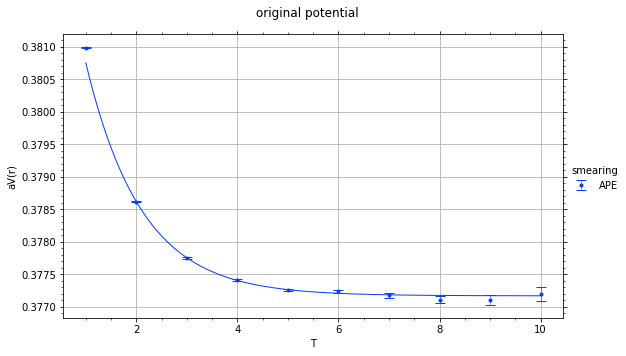

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


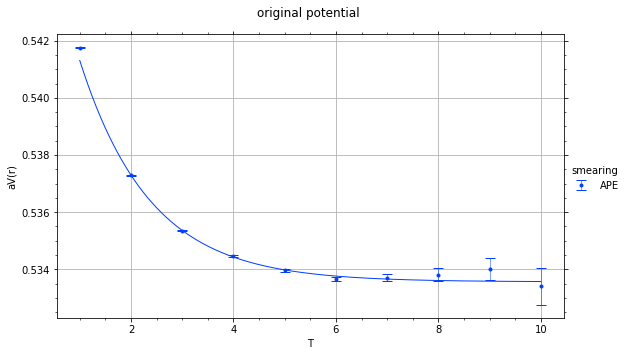

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


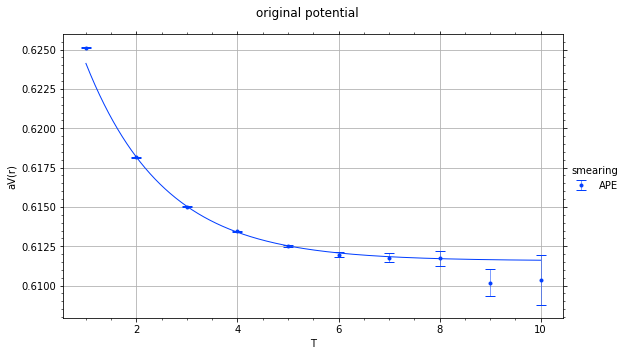

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


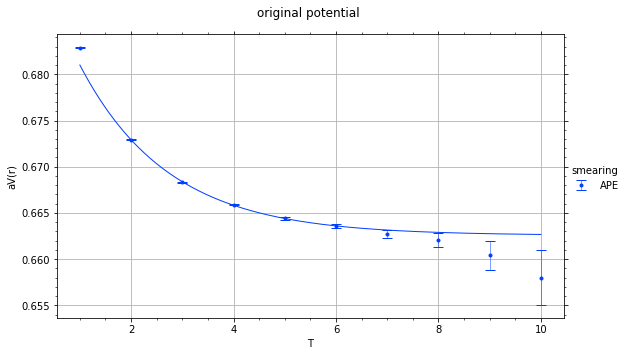

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


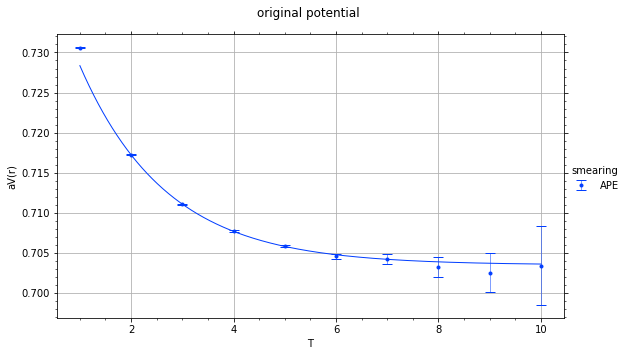

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


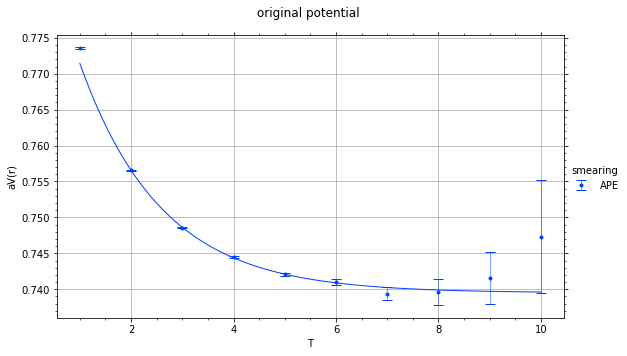

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


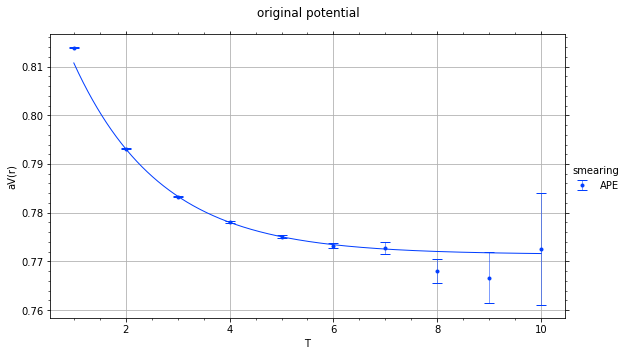

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


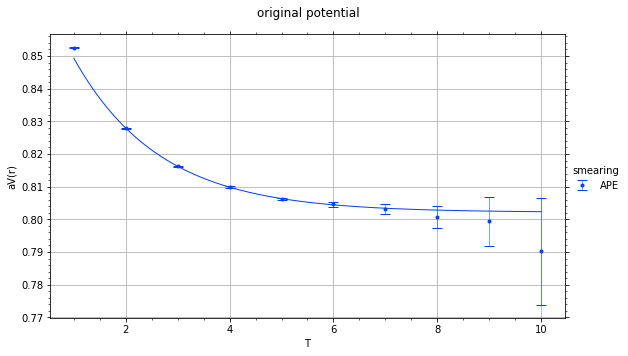

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


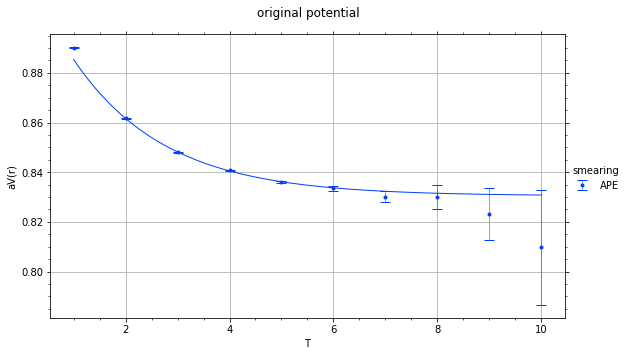

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


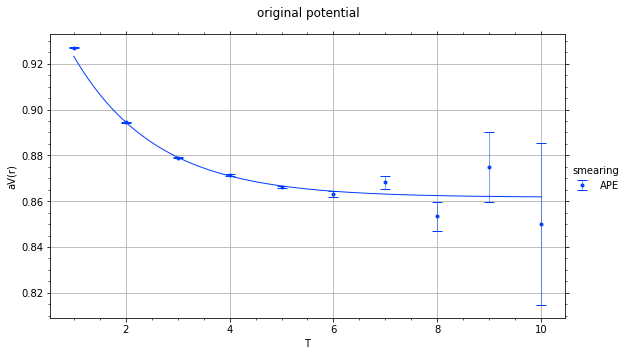

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


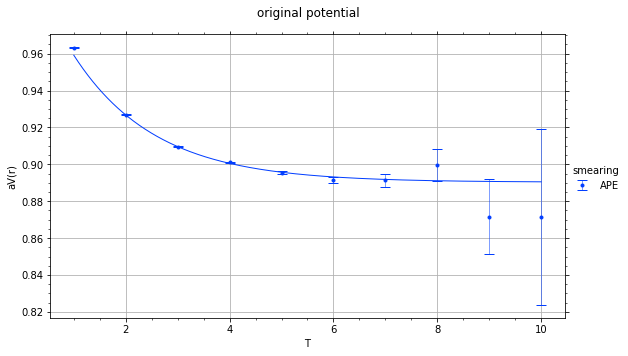

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


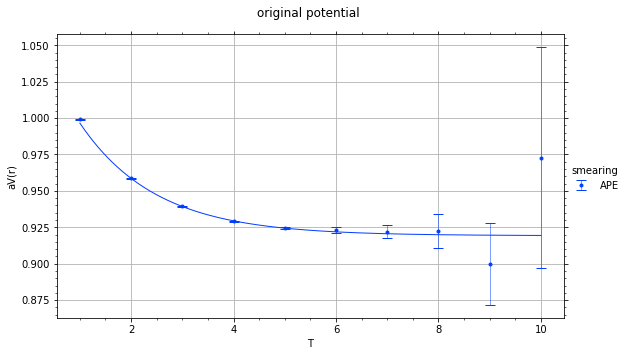

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


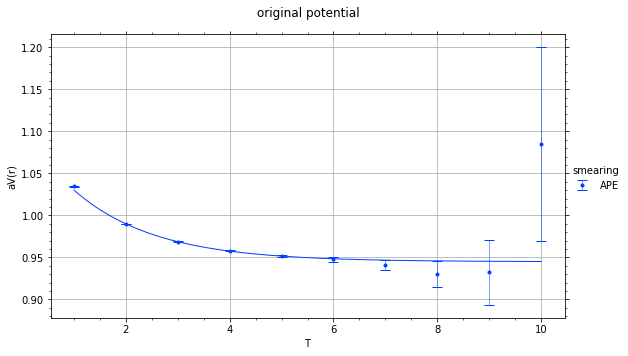

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


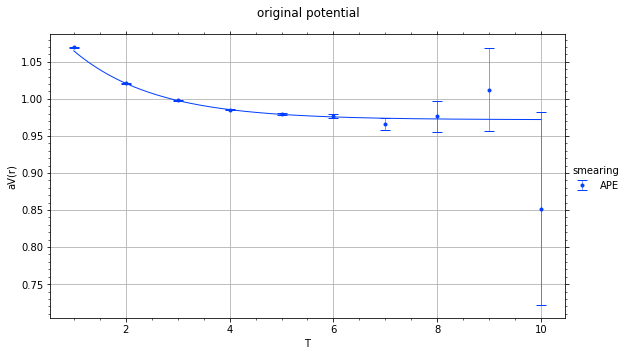

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


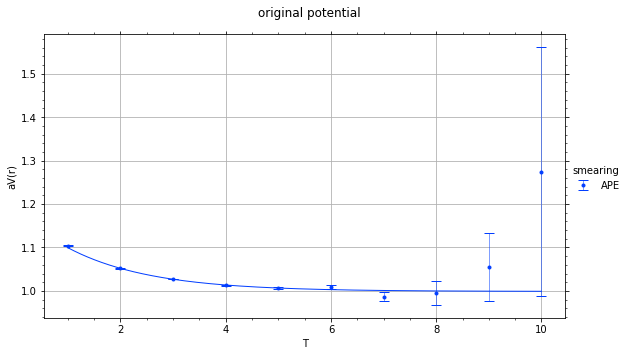

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


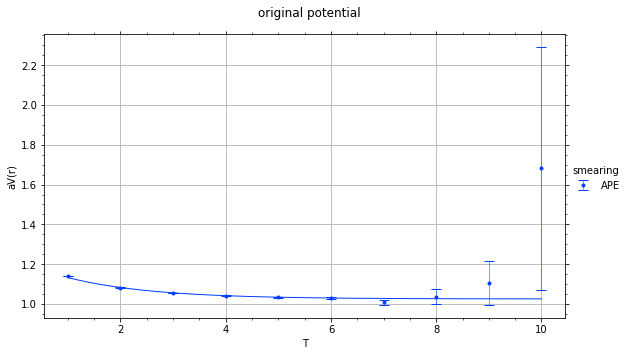

../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit/potential_orignal


In [7]:
show_plot = True
coordinate = 'T'
hue = 'smearing'
groupby = []
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^4/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/32^4/beta6.2/T_fit'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
df_fits = data.groupby('r/a').apply(fit.potential_fit_data, (2, 8), fit.func_exponent,['C', 'b', 'V'], 'T', 'aV(r)', err_col='err').reset_index(level='r/a')
df_fits['smearing'] = 'APE'
print(data)
for r in data['r/a'].unique():
    plots.plot_potential_single(data[data['r/a'] == r], coordinate, 'aV(r)', 'err', hue, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits[df_fits['r/a'] == r])

      T  r/a     aV(r)       err      beta potential_type smearing
0     1    1  0.381106  0.000005  beta=6.2       original      APE
1     2    1  0.378659  0.000006  beta=6.2       original      APE
2     3    1  0.377776  0.000008  beta=6.2       original      APE
3     4    1  0.377437  0.000010  beta=6.2       original      APE
4     5    1  0.377300  0.000013  beta=6.2       original      APE
..   ..  ...       ...       ...       ...            ...      ...
155   6   16  1.027315  0.004028  beta=6.2       original      APE
156   7   16  1.034168  0.011333  beta=6.2       original      APE
157   8   16  1.038558  0.031462  beta=6.2       original      APE
158   9   16  1.170722  0.102406  beta=6.2       original      APE
159  10   16  1.143272  0.323326  beta=6.2       original      APE

[160 rows x 7 columns]


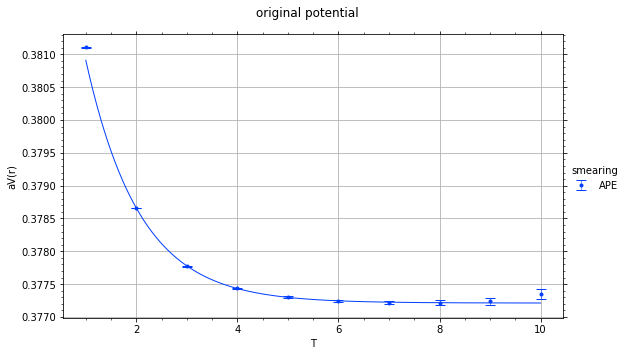

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


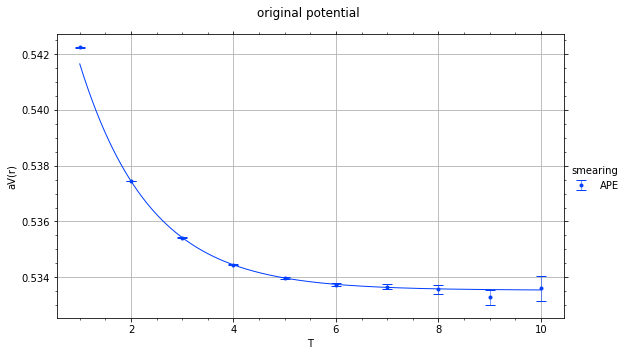

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


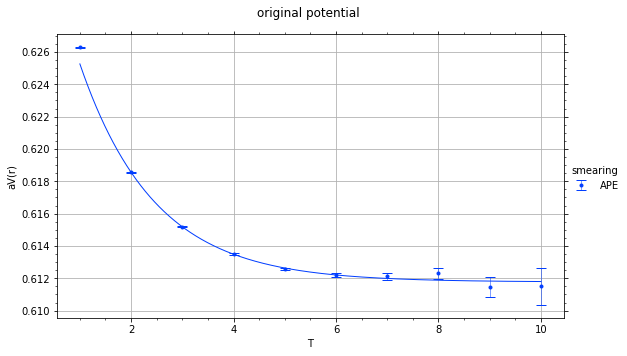

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


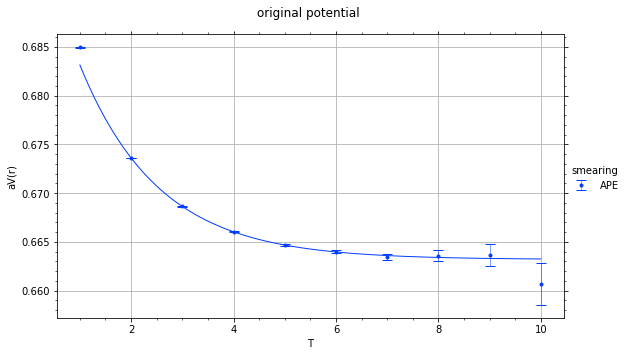

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


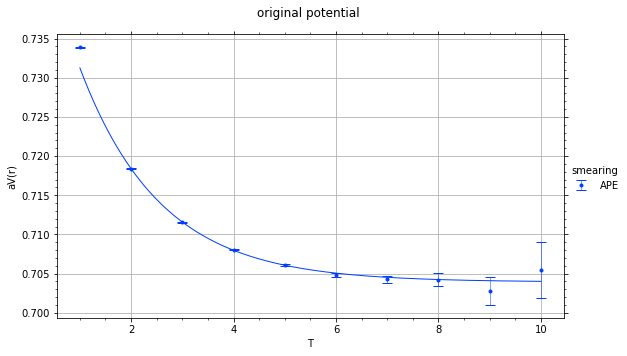

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


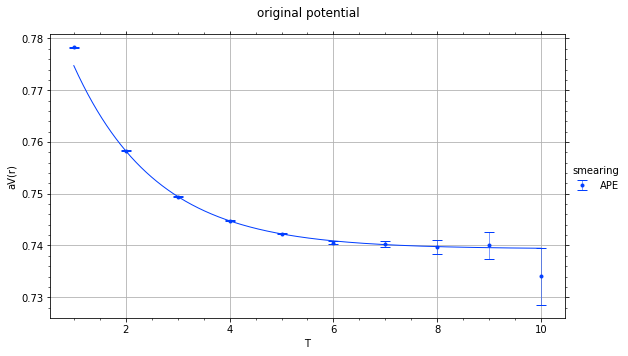

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


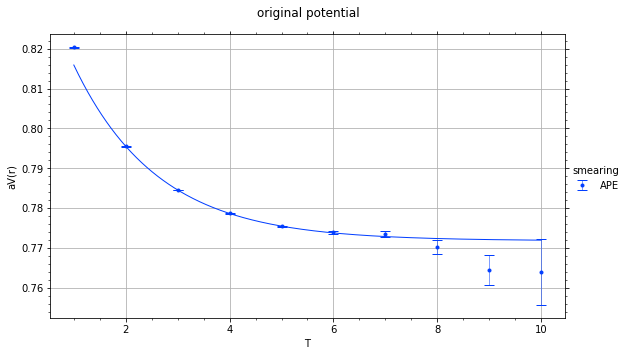

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


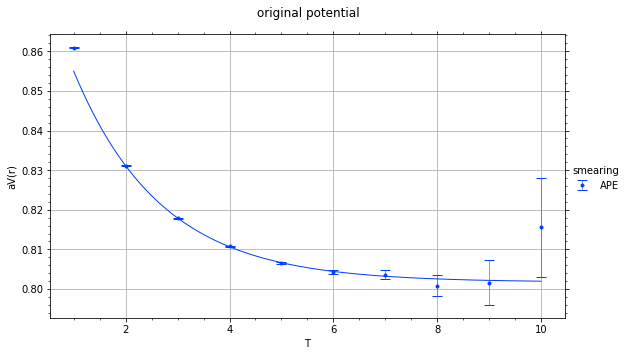

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


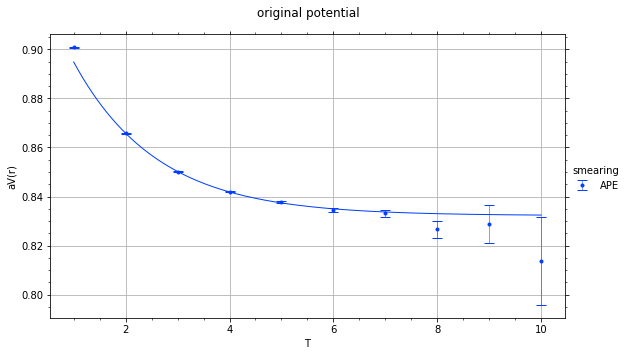

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


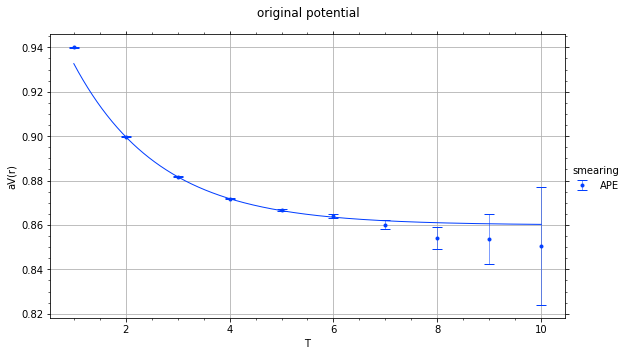

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


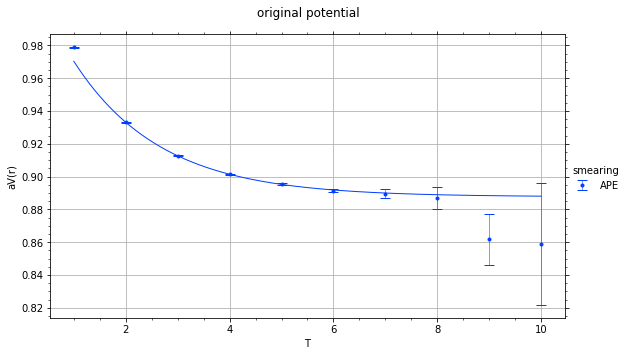

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


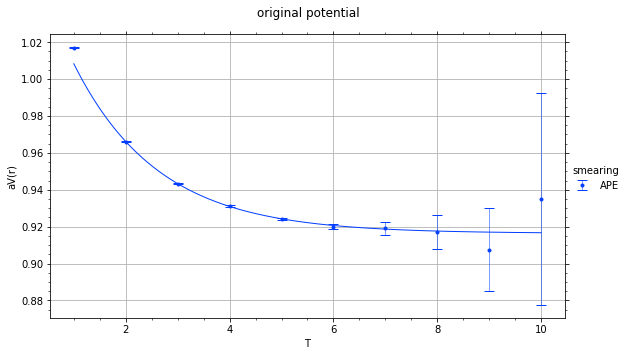

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


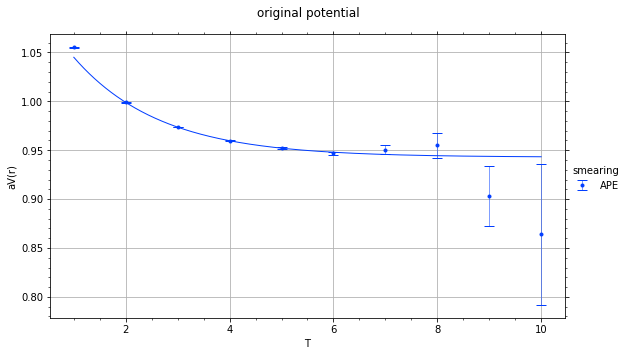

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


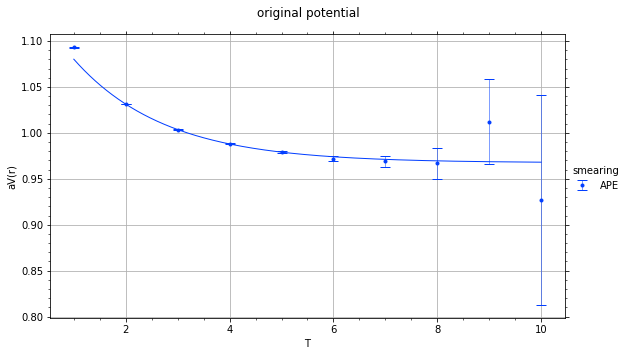

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


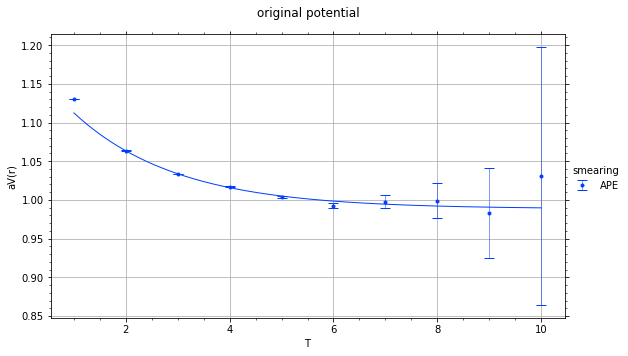

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


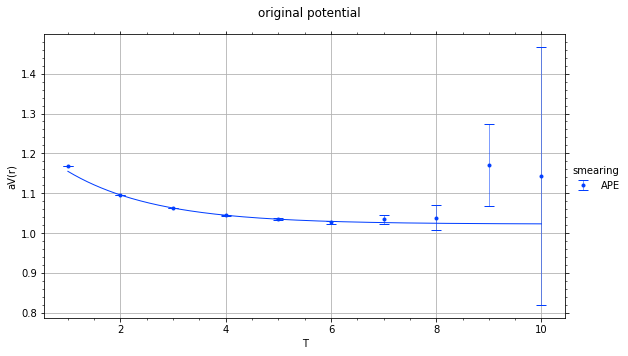

../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit/potential_orignal


In [3]:
show_plot = True
coordinate = 'T'
hue = 'smearing'
groupby = []
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/32^3/beta6.2/T_fit'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
df_fits = data.groupby('r/a').apply(fit.potential_fit_data, (2, 8), fit.func_exponent,['C', 'b', 'V'], 'T', 'aV(r)', err_col='err').reset_index(level='r/a')
df_fits['potential_type'] = 'original'
print(data)
for r in data['r/a'].unique():
    plots.plot_potential_single(data[data['r/a'] == r], coordinate, 'aV(r)', 'err', hue, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits[df_fits['r/a'] == r])